# Practica 4: Generación de informes


**Asignatura**: Analitica Web

**Estudiante**: Mabrouka Salmi

**Correo Electrónico**: z12salsm@uco.es

**Fecha**: 10/04/2024





##**Cargar el conjunto de datos**

Nuestro dataset es `LogsDataiku.csv` que almacena información de acceso al sitio web de Dataiku, durante 2 meses. Contiene información sobre cada vista de página individual en el sitio web www.Dataiku.com


In [1]:
import pandas as pd
import numpy as np

In [2]:
df =pd.read_csv("/content/drive/MyDrive/AW/LogsDataiku.csv")

In [3]:
df.head()

,server_ts,client_ts,client_addr,visitor_id,session_id,location,referer,user_agent,type,visitor_params,session_params,event_params,br_width,br_height,sc_width,sc_height,br_lang,tz_off
0,2014-03-01T03:39:23.099,2014-03-01T03:39:24.222,50.204.38.160,45467421ac4f218,463fe4c146ea482,http://dataiku.com/blog/2014/01/14/winning-kag...,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...,page,NaN,NaN,NaN,1920,986,1920,1080,en-US,300
1,2014-03-01T03:48:03.255,2014-03-01T03:48:02.658,27.32.161.160,5fcc5e41efb0fbd,bc65d2c1a81974f,http://www.dataiku.com/applications/,http://www.dataiku.com/products/shaker/,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,page,NaN,NaN,NaN,1680,963,1680,1050,en-GB,-660
2,2014-03-01T06:25:34.566,2014-03-01T06:25:34.524,66.250.143.150,1cad2751ed7eeaf,f6bc5851e373824,http://www.dataiku.com/,http://strataconf.com/strata2014/public/schedu...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1)...,page,NaN,NaN,NaN,1183,658,1280,800,en-US,300
3,2014-03-01T06:39:04.869,2014-03-01T06:39:06.764,207.126.92.0,aa7f46a1b81a297,958c8c612c038ba,http://dataiku.com/blog/2012/12/07/visualizing...,NaN,Mozilla/5.0 (Windows NT 6.1; rv:27.0) Gecko/20...,page,NaN,NaN,NaN,1366,664,1366,768,en-US,-480
4,2014-03-01T06:41:15.033,2014-03-01T06:41:06.496,70.72.174.130,488afab1d36e232,b2e7a6c1157aad1,http://www.dataiku.com/blog/2014/01/14/winning...,http://www.kaggle.com/c/yandex-personalized-we...,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,page,NaN,NaN,NaN,1920,995,1920,1080,en-US,420


**Estructura del dataset**


> El dataset, está en un fichero csv con 18 campos:


* server_ts: fecha de conexión al servidor
* client_ts: fecha de conexión del usuario
* client_addr: dirección IP del usuario
* visitor_id: id asignado al usuario (~ _utma)
* session_id: id de la sesión/visita (~ _utmb)
* location: url de la página a la que se accede
* referer: url de la página desde la que se accedió a location. Si está vacío se considera una
búsqueda directa
* user_agent: navegador desde el que se conectó el usuario
* type: tipo de acceso
* visitor_param
* sesion_param:
* event_param:
* br_width: ancho del navegador del usuario
* br_height: alto del navegador del usuario
* sc_width: ancho de la pantalla del usuario (resolución)
* sc_height: alto de la pantalla del usuario (resolución)
* br_lan: idioma del navegador del usuario
* tz_off: time zona. El número indica la diferencia en minutos con la hora GMT . -60 indica zona
horaria GMT+1 y 60 indica zona horaria GMT-1



## **Generación de informes**

Generamos de informes para, en base a los datos de Dataiku, podemos tomar las siguientes decisiones:
-  Qué idiomas debería soportar el sitio web
- Se quiere sacar una promoción durante un tiempo muy limitado. Qué hora sería la más
adecuada para llegar a un mayor número de usuarios
- Podemos decidir promocionarnos en los enlaces que vienen de serie con los navegadores. En
qué navegador sería más interesante hacernos publicidad

### **Idiomas a Soportar en el Sitio Web**
Para determinar los idiomas a soportar, hemos analizado el campo `br_lan` (idioma del navegador del usuario). Calculamos la frecuencia de cada idioma y los presentamos en orden descendente:

In [4]:
# Informe 1: Idiomas a Soportar en el Sitio Web
idiomas_frecuencia = df['br_lang'].value_counts()
print("Informe 1: Idiomas a Soportar en el Sitio Web\n")
print(idiomas_frecuencia)

Informe 1: Idiomas a Soportar en el Sitio Web

br_lang
fr       5033
en-US    2927
fr-fr     748
en-us     668
en-GB     360
         ... 
fr-ch       1
sv-se       1
fi-FI       1
ko-KR       1
es-AR       1
Name: count, Length: 68, dtype: int64


Here are the top 25 mostly used languages on the website:

In [5]:
print(idiomas_frecuencia.head(25))

br_lang
fr        5033
en-US     2927
fr-fr      748
en-us      668
en-GB      360
fr-FR      267
en         116
pt-BR      102
ru          73
zh-CN       60
de          53
es          49
en-gb       30
ja-jp       29
ja          25
de-de       18
en-ie       15
zh-tw       15
en-CA       14
pl-PL       14
es-es       13
es-419      13
de-DE       13
tr-TR       13
nl          12
Name: count, dtype: int64


Let's see the languages have been used by the users on the website during the given period:

In [6]:
df['br_lang'].unique()

array(['en-US', 'en-GB', 'fr', 'ja', 'fr-fr', 'pt-BR', 'en-us', 'he',
       'zh-cn', 'zh-CN', 'zh-tw', 'es-ES', 'ru-RU', 'fr-FR', 'da-dk',
       'ru', 'de', 'es-es', 'en', 'es', 'en-IN', 'ca', 'it-IT', 'de-DE',
       'nl-nl', 'cs', 'de-de', 'sv-se', 'C', 'ru-ru', 'tr-TR', 'zh-TW',
       'en-gb', 'pt-PT', 'bg', 'ja-JP', 'ca-es', 'id', 'pl', 'ja-jp',
       'pl-PL', 'es-MX', 'da', 'en-ie', 'es-419', 'fi-FI', 'nl', 'nb',
       'en-au', 'hr', 'en-ZA', 'es-AR', 'hu-HU', 'it', 'ko-KR', 'en_US',
       'en-AU', 'en-CA', 'fr-ch', 'ko', 'tr', 'sk-SK', 'de-ch', 'el',
       'hu', 'nl-be', 'fa', 'th'], dtype=object)

We noticed sort of duplication in the languages used in the visits/session, as the website could integrate the english language that could be understood by all english speakers no matter their accent are. For that we thought of grouping some languages abreviations into one language like American and Britain english could be grouped in english, the same goes for french and its accents, and so on.

In [7]:
# Mapping of similar language codes
language_mapping = {
    'fr': ['fr', 'fr-fr', 'fr-FR', 'fr-ch'],
    'en': ['en-US', 'en-us', 'en-GB', 'en', 'en-IN', 'en-gb', 'en-US', 'en-AU', 'en-CA', 'en_IE', 'en-au', 'en-za','en-ie', 'en_US','en-ZA'],
    'pt': ['pt-BR', 'pt-PT'],
    'zh': ['zh-cn', 'zh-CN', 'zh-tw', 'zh-TW'],
    'es': ['es-ES', 'es-es', 'es-MX', 'es-AR', 'es-419'],
    'ru': ['ru-RU', 'ru', 'ru-ru'],
    'de': ['de', 'de-DE', 'de-de', 'de-ch'],
    'ja': ['ja', 'ja-JP', 'ja-jp'],
    'it': ['it-IT', 'it'],
    'ko': ['ko-KR', 'ko'],
    'nl': ['nl-nl', 'nl', 'nl-be'],
    'sv': ['sv-se'],
    'da': ['da-dk', 'da'],
    'tr': ['tr-TR', 'tr'],
    'cs': ['cs'],
    'ca': ['ca', 'ca-es'],
    'pl': ['pl', 'pl-PL'],
    'id': ['id'],
    'bg': ['bg'],
    'fi': ['fi-FI'],
    'nb': ['nb'],
    'hr': ['hr'],
    'hu': ['hu-HU', 'hu'],
    'sk': ['sk-SK'],
    'fa': ['fa'],
    'th': ['th'],
    'el': ['el'],
}

# Create a new column with standardized language codes
df['standard_language'] = df['br_lang']

# Update language codes based on the mapping
for standard_code, variants in language_mapping.items():
    df.loc[df['br_lang'].isin(variants), 'standard_language'] = standard_code

# Group by standardized language and count frequencies
language_frequencies = df['standard_language'].value_counts()

print("Standardized Language Frequencies:")
print(language_frequencies)


Standardized Language Frequencies:
standard_language
fr    6049
en    4153
pt     104
de      90
zh      89
es      87
ru      80
ja      56
pl      24
nl      21
ca      15
tr      14
da      12
cs       9
it       8
bg       7
he       6
th       5
id       4
nb       3
C        2
hu       2
ko       2
sk       2
fi       1
hr       1
el       1
fa       1
sv       1
Name: count, dtype: int64


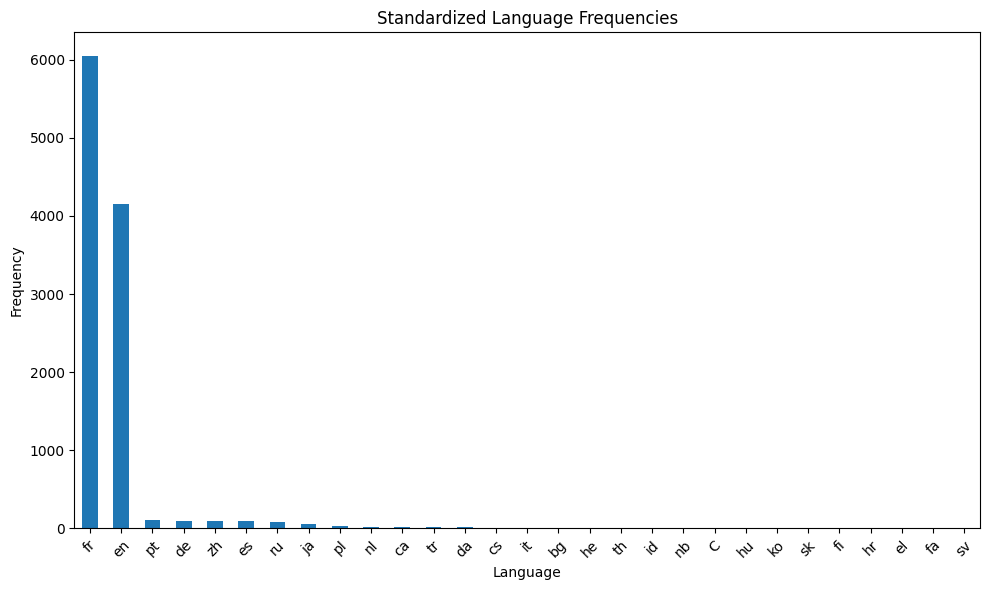

In [8]:
import matplotlib.pyplot as plt
# Plot frequencies
plt.figure(figsize=(10, 6))
language_frequencies.plot(kind='bar')
plt.title('Standardized Language Frequencies')
plt.xlabel('Language')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

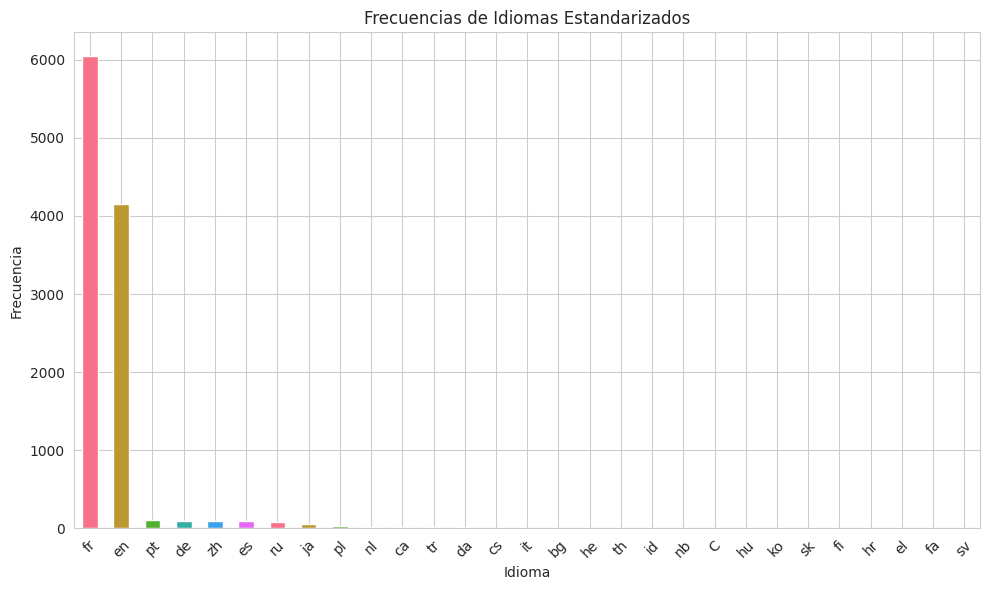

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import Seaborn for color palettes

# Set Seaborn style and color palette
sns.set_style("whitegrid")
sns.set_palette("husl")  # You can change the palette as needed

# Plot frequencies with specified palette
plt.figure(figsize=(10, 6))
language_frequencies.plot(kind='bar',  color=sns.color_palette())
plt.title('Frecuencias de Idiomas Estandarizados')
plt.xlabel('Idioma')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Hora Óptima para Promoción**

Analizamos la distribución de accesos por hora y encontramos que la franja horaria con mayor cantidad de accesos.

In [9]:
# Informe 2: Hora Óptima para Promoción
df['client_ts'] = pd.to_datetime(df['client_ts'])
df['hour'] = df['client_ts'].dt.hour
horas_frecuencia = df['hour'].value_counts().sort_index()
print("\nInforme 2: Hora Óptima para Promoción\n")
print(horas_frecuencia)


Informe 2: Hora Óptima para Promoción

hour
0      167
1      184
2      179
3       96
4      135
5      130
6      243
7      241
8      485
9      624
10     523
11     535
12     654
13     738
14    1104
15     949
16     860
17     657
18     404
19     384
20     552
21     488
22     286
23     231
Name: count, dtype: int64


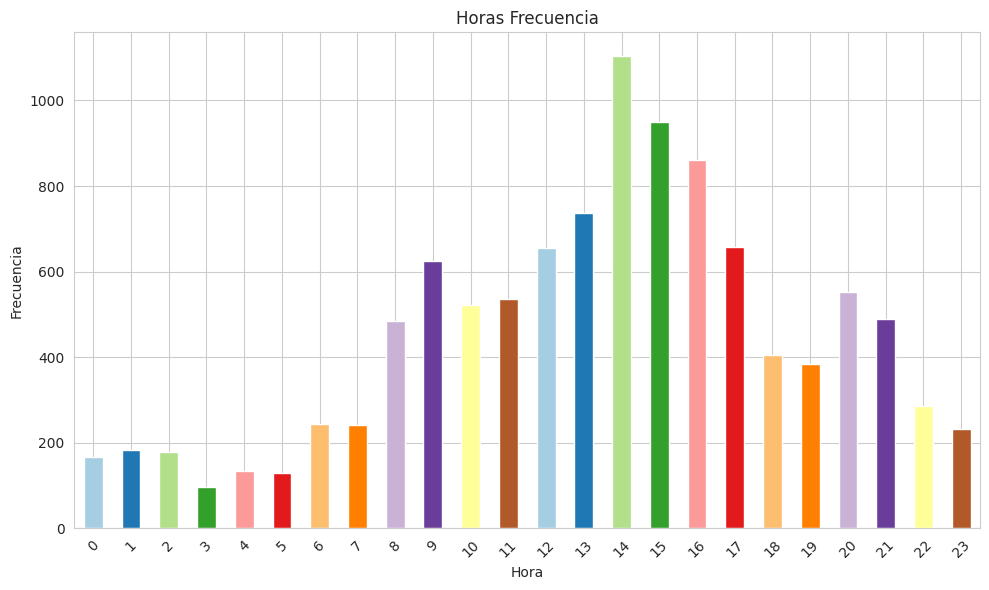

In [30]:
import matplotlib.pyplot as plt
# Plot frequencies
plt.figure(figsize=(10, 6))
horas_frecuencia.plot(kind='bar', color=sns.color_palette('Paired'))
plt.title('Horas Frecuencia')
plt.xlabel('Hora')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Publicidad en Navegadores**
Tenemos que analizar la frecuencia de acceso por navegador y encontrar  los navegadores más utilizados

In [11]:
# Informe 3: Publicidad en Navegadores
# Ensure 'user_agent' column contains string values
df['user_agent'] = df['user_agent'].astype(str)

# Extract browser names from 'user_agent' column
df['browser'] = df['user_agent'].str.split('/').str[0]
navegadores_frecuencia = df['browser'].value_counts()
print("\nInforme 3: Publicidad en Navegadores\n")
print(navegadores_frecuencia)


Informe 3: Publicidad en Navegadores

browser
Mozilla           10838
Opera                 9
ThumbnailAgent        2
Name: count, dtype: int64


In [21]:
# Create a DataFrame from the results
navegadores_df = pd.DataFrame({'Browser': navegadores_frecuencia.index, 'Frequency': navegadores_frecuencia.values})

print("DataFrame for Browser Frequencies:")
navegadores_df.head()

DataFrame for Browser Frequencies:


,Browser,Frequency
0,Mozilla,10838
1,Opera,9
2,ThumbnailAgent,2


from matplotlib import pyplot as plt
_df_0['Frequency'].plot(kind='hist', bins=20, title='Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Browser').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Frequency'].plot(kind='line', figsize=(8, 4), title='Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['Browser'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='Frequency', y='Browser', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

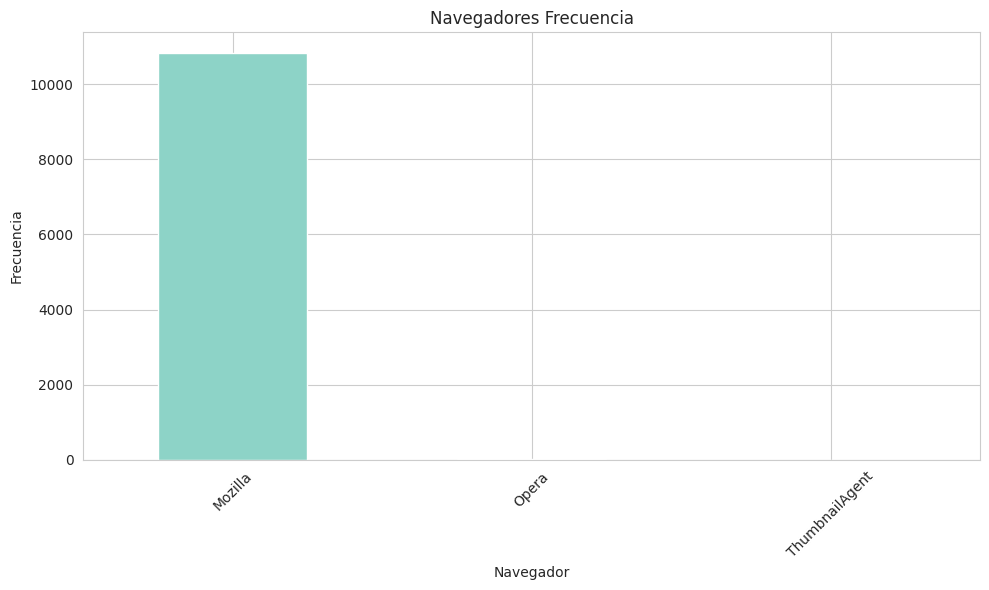

In [31]:
# Plotting
plt.figure(figsize=(10, 6))
navegadores_frecuencia.plot(kind='bar',color=sns.color_palette('Set3'))
plt.title('Navegadores Frecuencia')
plt.xlabel('Navegador')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()